<a href="https://colab.research.google.com/github/srbee/python/blob/master/myDFTzoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== My DFT Jupyter+Lab + Python 3 using variable number of arguments
No of samples=  72


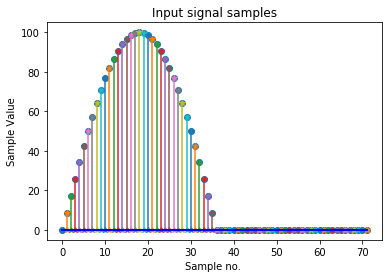

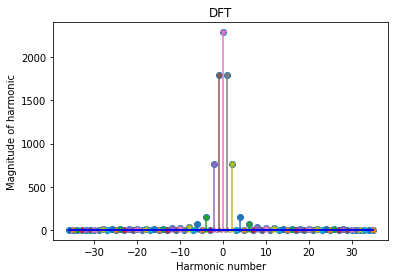

In [9]:
import math
import numpy as np
import scipy as sp  # check whether this is correct
import matplotlib.pyplot as plt

def myDFT(samp):
    """
    myDFT accepts variable number of samples
    
    """
    samples=np.array(samp,'float') # convert in to array using numpy
    N=len(samples)
    Xcos=np.zeros(N)
    Xsin=np.zeros(N)
    Xmag=np.zeros(N)
    
    print("No of samples= ",N)
    
    k=0
    for m in range(N):
        for n in range(N):
            Xcos[m]=Xcos[m]+samples[n]*math.cos((2*math.pi*m*n)/N)
            Xsin[m]=Xsin[m]+samples[n]*math.sin((2*math.pi*m*n)/N)
            Xmag[m]=math.sqrt(Xcos[m]*Xcos[m]+Xsin[m]*Xsin[m])
            k+=1
            
    #print('Xcos=',Xcos)
    #print('Xsin=',Xsin)
    return (N,Xmag,samples) # Returning a tuple ( three values)
#========================================================================
#==================== End of function myDFT(signal) =====================
#========================================================================

print('=== My DFT Jupyter+Lab + Python 3 using variable number of arguments')

#============= Signal Zoo =========================================

impulse_start=[100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\
              ] # Signal No.1

impulse_centre=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
                100,\
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\
               ] # Signal No.2

constant_dc=100*np.ones(20) # SIgnal No.3 

pulse_centre=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
                    100,100,100,100,\
              0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\
             ] # Signal No.4

pulse_start=[100,100,100,100,\
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\
             ] # Signal No. 5


ramp=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20\
     ] # Signal No. 6

triangle=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,\
          19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0\
          ] # Signal No. 7

sawtooth=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,\
          0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20\
         ] # Signal No. 8

trapezoid=[0,1,2,3,4,5,6,7,8,9,10,\
           10,10,10,10,10,10,10,10,\
           10,9,8,7,6,5,4,3,2,1,0\
          ] # Signal No. 9
   # =============  Following is list comprehension ==============
cosine =[100*math.cos(x) for x in np.arange(0,2*math.pi,math.pi/18)] # Sig No.10
# Following is list comprehension
sine   =[100*math.sin(x) for x in np.arange(0,2*math.pi,math.pi/18)]#sig No 11

halfwave= [100*math.sin(x) if (x<=math.pi) else 0  for x in np.arange(0,2*math.pi,math.pi/36) ] # Sig No 12

fullwave=[abs(100*math.sin(x)) for x in np.arange(0,2*math.pi,math.pi/36)] #  Sig No. 13

squares=[x*x for x in np.arange(1,20,1)] # Sig No 14

n=10
nonlin_incr =[pow(x,n) for x in np.arange(.1,2,.01)] # Sig No 15

nonlin_decr =[100*pow(x,1) for x in np.arange(0.1,2,.01)] # Sig No. 16

e=math.exp(1) 

ed=[100*pow(e,2)*pow(e,-t) for t in np.arange(0,2,0.2)] # Sig No  17

ei=[100*pow(e, t) for t in np.arange(0,2,0.2,)] # Sig No 18

ei_copy=ei

ei_copy.extend(ed)
double_expo=ei_copy # Sig No 19






#================= End of Signal Zoo  ========================
#print(msig)

#===========================================================
N,XX,signal=myDFT(halfwave)#  <= Call to myDFT(signal)
#===========================================================

Nby2=int(N/2)
XXX=np.roll(XX,Nby2)
# third entity returned is the name of the input array
x = np.arange(N) 
xshift=x-Nby2
#print(xshift)
#==========  For plotting signal waveform ======================
markerline, stemlines, baseline = plt.stem(x,signal, '-*')
# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='b', linewidth=2)
plt.title('Input signal samples')
plt.xlabel('Sample no. ')
plt.ylabel('Sample Value')
plt.show() # Signal waveform
#===============================================================

#========== For plotting DFT ===================================
markerline, stemlines, baseline = plt.stem(xshift, XXX, '-*')
# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='b', linewidth=2)
plt.title('DFT' )
plt.xlabel('Harmonic number')
plt.ylabel('Magnitude of harmonic')

plt.show() #  DFT 
#========================================

from scipy.fftpack import fft, ifft
y=abs(fft(signal))
#print(XX)
#print(y)
#print(XX-y)